<a href="https://colab.research.google.com/github/Roberto5200/Roberto-/blob/main/Exploraci%C3%B3n_del_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Declaración de librerías

Las celdas de código están escritas siguiendo la sintaxis del lenguaje de programación en Python. Esta celda de código permite cargar librerías. Una librería es un conjunto de comandos preescritos para que los programadores pueden utilizar y realizar tareas específicas sin necesidad de escribir el código desde cero.


In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configurar estilos de gráficos
sns.set(style="whitegrid")

# Esta línea permite que las visualizaciones sean renderizadas directamente en el cuaderno
%matplotlib inline

## Carga del conjunto datos (dataset)

La presente celda permite cargar un archivo que representa el dataset a explorar mediante el comando files.upload(). El comando print() permite mostrar el contenido del archivo.

In [ ]:
datos = files.upload()
print(datos)

Saving notasci.csv to notasci (1).csv
{'notasci (1).csv': b'\xef\xbb\xbfCEDULA,N61,N71,N101,N111,N121,P1,E1,H1,R1,N62,N72,N102,N112,N122,P2,E2,H2,NOTA,R2\r\n0705997302,2,1,1,1,2,7,0.3,7.3,A,2,1,1,1,2,7,2.4,9.4,8.35,A\r\n0705607950,2,1,1,1,2,7,0.6,7.6,A,2,1,1,1,2,7,2.1,9.1,8.35,A\r\n0750125148,2,1,1,1,2,7,0,7,A,2,1,1,1,2,7,2.4,9.4,8.2,A\r\n0106155351,1.87,0.95,1,1,2,6.82,0.3,7.12,A,2,0.5,1,1,2,6.5,2.55,9.05,8.09,A\r\n0750613168,2,1,1,1,2,7,0.3,7.3,A,2,1,1,1,2,7,1.5,8.5,7.9,A\r\n0750867319,2,0.9,1,1,2,6.9,2.1,9,A,1,0.9,1,1,2,5.9,1.5,7.4,8.2,A\r\n0750174245,1.3,1,0.5,0.8,1.6,5.2,0.3,5.5,R,0,0,0,0,0,0,0,0,2.75,R\r\n0706404480,2,1,1,1,2,7,0.9,7.9,A,2,1,1,1,2,7,1.8,8.8,8.35,A\r\n0705730471,2,0.7,1,1,2,6.7,0.3,7,A,2,1,1,1,2,7,2.4,9.4,8.2,A\r\n0705485381,1.9,1,1,1,2,6.9,0.3,7.2,A,2,1,1,1,2,7,2.1,9.1,8.15,A\r\n0705523900,1.77,0.9,1,1,2,6.67,1.05,7.72,A,2,0.5,1,1,2,6.5,1.8,8.3,8.01,A\r\n0704982156,0,0,0.5,0.2,0.4,1.1,0,1.1,R,0,0,0,0,0,0,0,0,0.55,R\r\n0706433430,2,1,1,1,2,7,0.6,7.6,A,2,1,1,1,2,7,

Una vez cargado el archivo, se procede a leer su ubicación y convertirlo en un dataframe a través de la librería Pandas. El comando read_csv() permite acceder al contenido del archivo en formato .csv.

In [ ]:
tabla = pd.read_csv("/content/notasci.csv")
tabla

,CEDULA,N61,N71,N101,N111,N121,P1,E1,H1,R1,N62,N72,N102,N112,N122,P2,E2,H2,NOTA,R2
0,705997302,2.00,1.00,1.0,1.0,2.0,7.00,0.30,7.30,A,2,1.0,1.0,1.0,2.0,7.0,2.40,9.40,8.35,A
1,705607950,2.00,1.00,1.0,1.0,2.0,7.00,0.60,7.60,A,2,1.0,1.0,1.0,2.0,7.0,2.10,9.10,8.35,A
2,750125148,2.00,1.00,1.0,1.0,2.0,7.00,0.00,7.00,A,2,1.0,1.0,1.0,2.0,7.0,2.40,9.40,8.20,A
3,106155351,1.87,0.95,1.0,1.0,2.0,6.82,0.30,7.12,A,2,0.5,1.0,1.0,2.0,6.5,2.55,9.05,8.09,A
4,750613168,2.00,1.00,1.0,1.0,2.0,7.00,0.30,7.30,A,2,1.0,1.0,1.0,2.0,7.0,1.50,8.50,7.90,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,706467131,1.80,1.00,1.0,1.0,1.8,6.60,2.60,9.20,A,1,1.0,1.0,1.0,2.0,6.0,2.40,8.40,8.80,A
69,706863123,1.80,1.00,1.0,1.0,1.4,6.20,1.75,7.95,A,1,1.0,1.0,1.0,2.0,6.0,2.70,8.70,8.33,A
70,750048076,1.80,1.00,1.0,1.0,1.8,6.60,2.65,9.25,A,1,1.0,1.0,1.0,2.0,6.0,2.10,8.10,8.68,A
71,960081925,1.80,1.00,1.0,1.0,1.4,6.20,3.00,9.20,A,1,1.0,1.0,1.0,2.0,6.0,2.70,8.70,8.95,A


## Exploración de datos

El método head() permite visibilizar las primeras cinco observaciones del dataset.

In [ ]:
tabla.head()

,CEDULA,N61,N71,N101,N111,N121,P1,E1,H1,R1,N62,N72,N102,N112,N122,P2,E2,H2,NOTA,R2
0,705997302,2.00,1.00,1.0,1.0,2.0,7.00,0.3,7.30,A,2,1.0,1.0,1.0,2.0,7.0,2.40,9.40,8.35,A
1,705607950,2.00,1.00,1.0,1.0,2.0,7.00,0.6,7.60,A,2,1.0,1.0,1.0,2.0,7.0,2.10,9.10,8.35,A
2,750125148,2.00,1.00,1.0,1.0,2.0,7.00,0.0,7.00,A,2,1.0,1.0,1.0,2.0,7.0,2.40,9.40,8.20,A
3,106155351,1.87,0.95,1.0,1.0,2.0,6.82,0.3,7.12,A,2,0.5,1.0,1.0,2.0,6.5,2.55,9.05,8.09,A
4,750613168,2.00,1.00,1.0,1.0,2.0,7.00,0.3,7.30,A,2,1.0,1.0,1.0,2.0,7.0,1.50,8.50,7.90,A


Para acceder a una variable en especifico, se acompaña el nombre del dataframe con corchetes [ ] y se coloca el nombre de la variable entre comillas " " al interior de los corchetes.

In [ ]:
tabla["R1"]

0     A
1     A
2     A
3     A
4     A
     ..
68    A
69    A
70    A
71    A
72    A
Name: R1, Length: 73, dtype: object

El método info() permite mostrar información general sobre el dataset, especificamente sobre el número de observaciones válidas y sobre el tipo de dato de cada variable

In [ ]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CEDULA  73 non-null     int64  
 1   N61     73 non-null     float64
 2   N71     73 non-null     float64
 3   N101    73 non-null     float64
 4   N111    73 non-null     float64
 5   N121    73 non-null     float64
 6   P1      73 non-null     float64
 7   E1      73 non-null     float64
 8   H1      73 non-null     float64
 9   R1      73 non-null     object 
 10  N62     73 non-null     int64  
 11  N72     73 non-null     float64
 12  N102    73 non-null     float64
 13  N112    73 non-null     float64
 14  N122    73 non-null     float64
 15  P2      73 non-null     float64
 16  E2      73 non-null     float64
 17  H2      73 non-null     float64
 18  NOTA    73 non-null     float64
 19  R2      73 non-null     object 
dtypes: float64(16), int64(2), object(2)
memory usage: 11.5+ KB


La variable CEDULA del dataframe es del int64. Para convertir esta variable en una cadena de caracteres se utiliza el metodo astype(str).

In [ ]:
tabla["CEDULA"] = tabla["CEDULA"].astype(str)
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CEDULA  73 non-null     object 
 1   N61     73 non-null     float64
 2   N71     73 non-null     float64
 3   N101    73 non-null     float64
 4   N111    73 non-null     float64
 5   N121    73 non-null     float64
 6   P1      73 non-null     float64
 7   E1      73 non-null     float64
 8   H1      73 non-null     float64
 9   R1      73 non-null     object 
 10  N62     73 non-null     int64  
 11  N72     73 non-null     float64
 12  N102    73 non-null     float64
 13  N112    73 non-null     float64
 14  N122    73 non-null     float64
 15  P2      73 non-null     float64
 16  E2      73 non-null     float64
 17  H2      73 non-null     float64
 18  NOTA    73 non-null     float64
 19  R2      73 non-null     object 
dtypes: float64(16), int64(1), object(3)
memory usage: 11.5+ KB


El método describe() presenta la descripción estadística de los datos numéricos.


*   *count* es la frecuencia
*   *mean* es la media
*   *std* es la desviación estándar
*   *min* es el valor mínimo de las observaciones
*   *25%* es el percentil 25
*   *50%* es el percentil 50
*   *75%* es el percentil 75
*   *max* es el valor mínimo de las observaciones

In [ ]:
tabla.describe()

,N61,N71,N101,N111,N121,P1,E1,H1,N62,N72,N102,N112,N122,P2,E2,H2,NOTA
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,1.628767,0.852740,0.939726,0.903151,1.703562,6.027945,1.904110,7.932055,1.301370,0.881507,0.925342,0.904110,1.771233,5.783562,2.198630,7.982192,7.958767
std,0.551425,0.322952,0.172192,0.235472,0.535447,1.465748,1.052997,2.031300,0.593599,0.286927,0.241684,0.284526,0.566294,1.693863,0.759613,2.253028,1.970782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
25%,1.600000,1.000000,1.000000,1.000000,1.800000,6.000000,0.900000,7.120000,1.000000,1.000000,1.000000,1.000000,2.000000,5.900000,2.100000,8.050000,7.900000
50%,1.800000,1.000000,1.000000,1.000000,2.000000,6.640000,2.350000,8.150000,1.000000,1.000000,1.000000,1.000000,2.000000,6.000000,2.400000,8.700000,8.350000
75%,2.000000,1.000000,1.000000,1.000000,2.000000,6.820000,2.700000,9.450000,2.000000,1.000000,1.000000,1.000000,2.000000,7.000000,2.700000,9.100000,9.100000
max,2.000000,1.000000,1.000000,1.000000,2.000000,7.000000,3.000000,10.000000,2.000000,1.000000,1.000000,1.000000,2.000000,7.000000,3.000000,10.000000,9.800000


El metodo describe() se puede aplicar de forma individual a cada variable usando los corchetes [ ].

In [ ]:
tabla["NOTA"].describe()

count    73.000000
mean      7.958767
std       1.970782
min       0.500000
25%       7.900000
50%       8.350000
75%       9.100000
max       9.800000
Name: NOTA, dtype: float64

## Análisis exploratorio

Para obtener estadísticos sobre las variables numéricas, se selecciona incluyen las variables tipo float64 y se excluye las variables tipo object.

In [ ]:
tabla_num = tabla.select_dtypes(include = float, exclude = object)
tabla_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N61     73 non-null     float64
 1   N71     73 non-null     float64
 2   N101    73 non-null     float64
 3   N111    73 non-null     float64
 4   N121    73 non-null     float64
 5   P1      73 non-null     float64
 6   E1      73 non-null     float64
 7   H1      73 non-null     float64
 8   N72     73 non-null     float64
 9   N102    73 non-null     float64
 10  N112    73 non-null     float64
 11  N122    73 non-null     float64
 12  P2      73 non-null     float64
 13  E2      73 non-null     float64
 14  H2      73 non-null     float64
 15  NOTA    73 non-null     float64
dtypes: float64(16)
memory usage: 9.2 KB


Los histogramas ayudan a la visualización de la distribución de las variables numéricas a través del método hist().


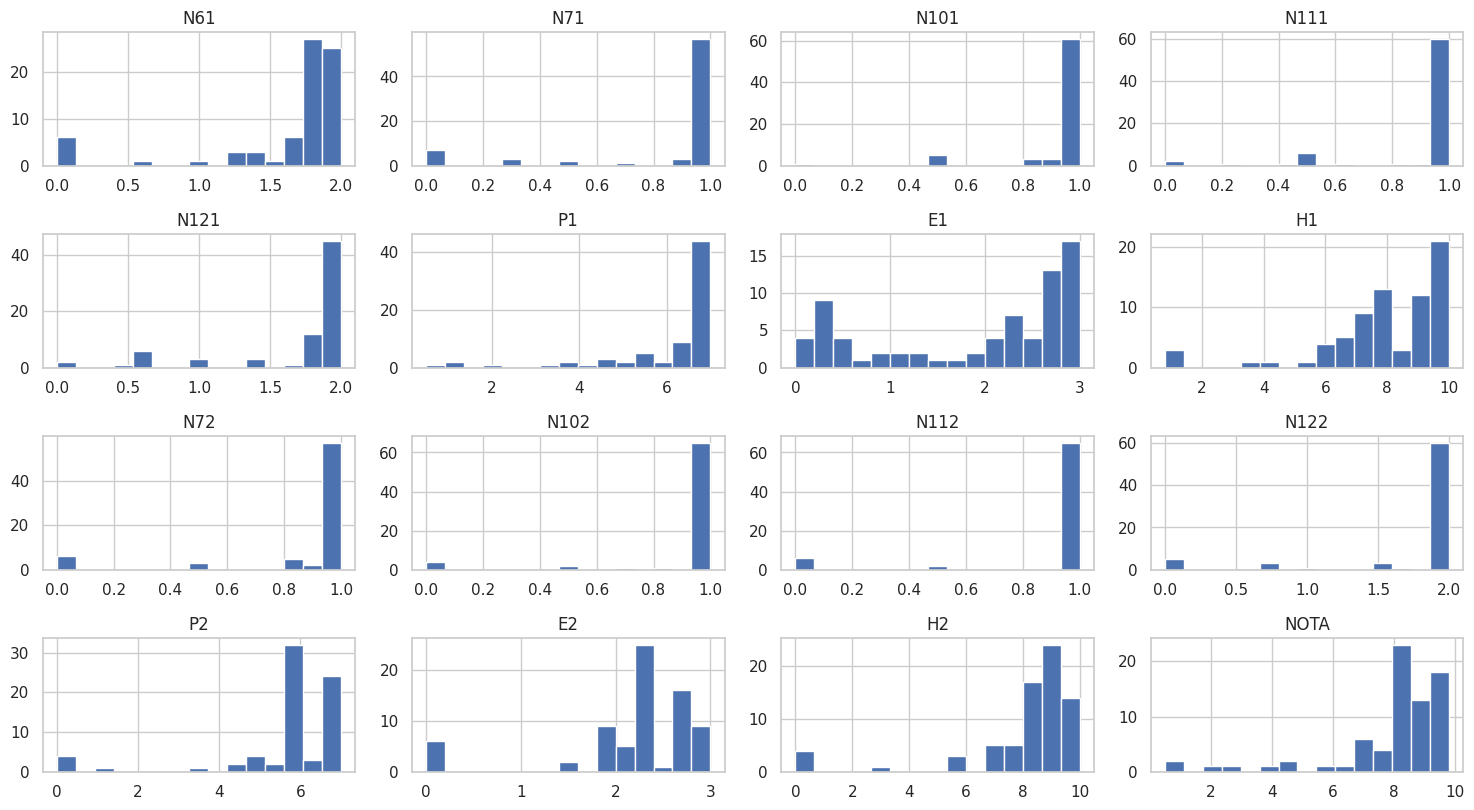

In [ ]:
tabla_num.hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()

También se puede seleccionar una variable del conjunto de datos y obtener el histogram para conocer su distribución.



<Axes: >

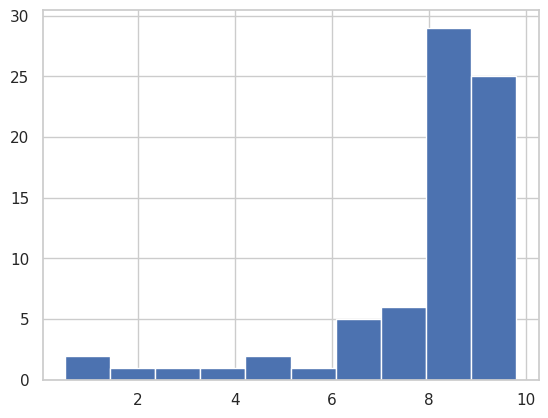

In [ ]:
tabla_num["NOTA"].hist()

Se puede recurrir a los diagramas de caja para la identificación de valores atípicos mediante método boxplot() de la librería sns.


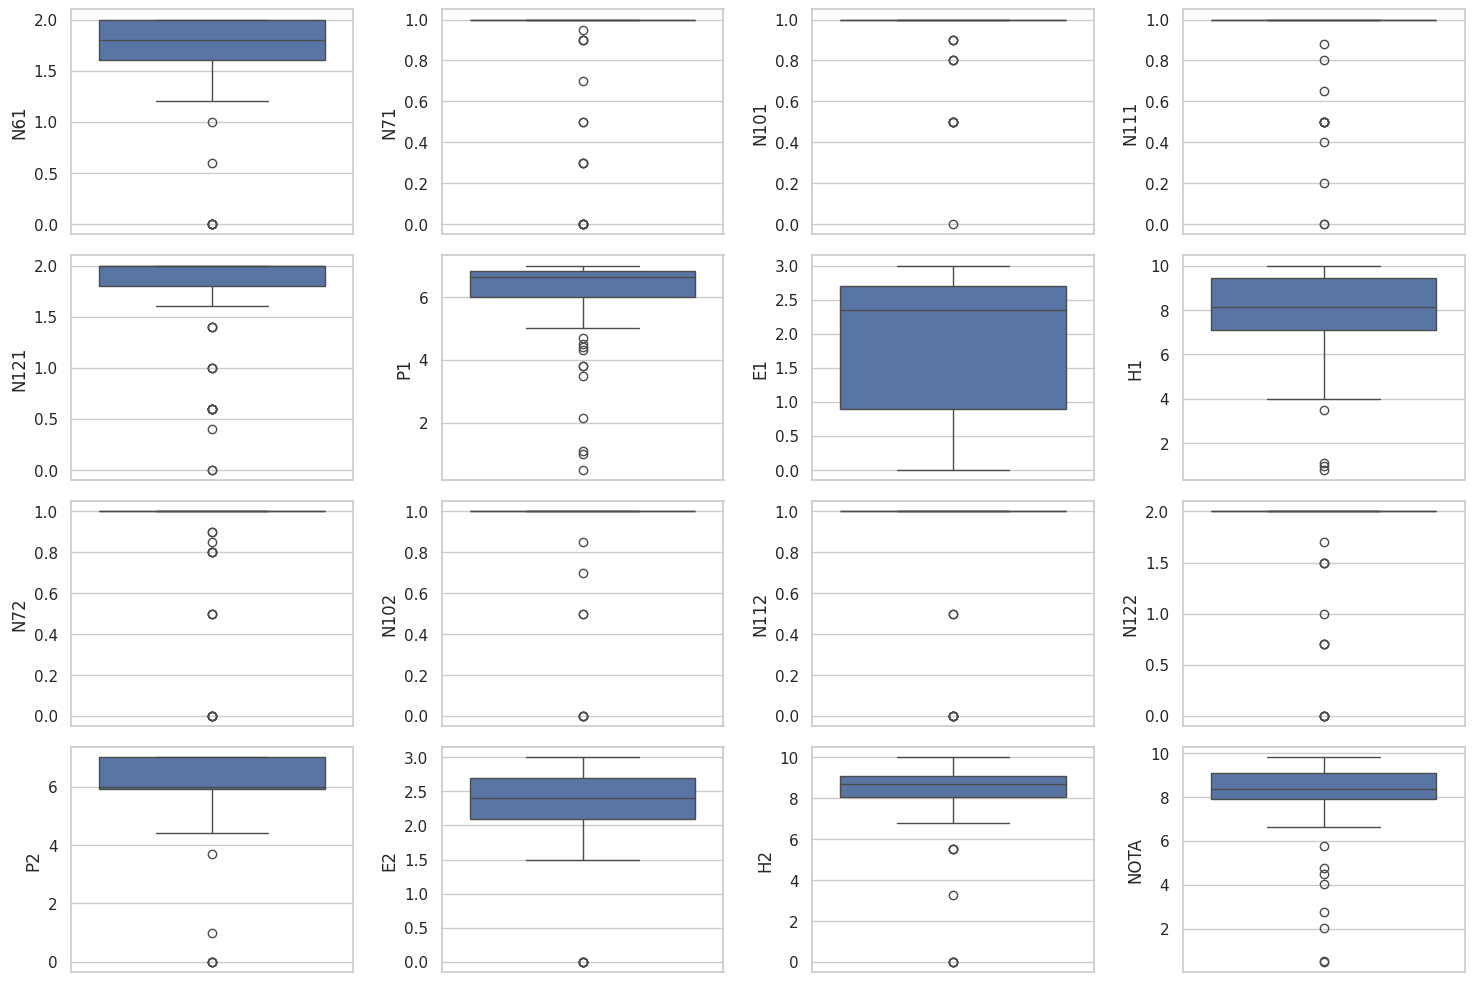

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))
for i, column in enumerate(tabla_num.columns):
    sns.boxplot(tabla_num[column], ax=axes[i//4, i%4])
plt.tight_layout()
plt.show()

También se puede seleccionar una variable del conjunto de datos y obtener el diagrama de cajas para conocer de forma individual.

<Axes: ylabel='H1'>

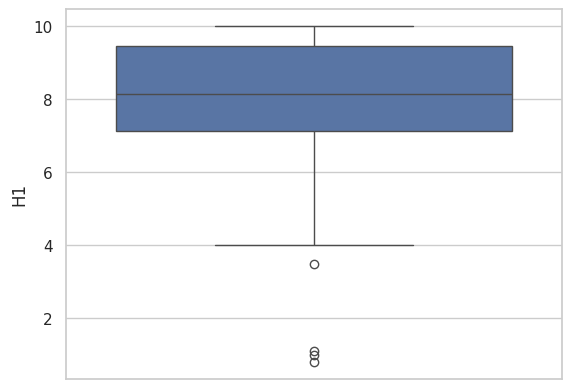

In [ ]:
sns.boxplot(tabla_num["H1"])

El mapa de calor para visualizar correlaciones se obtiene a través del método heatmap() de la librería sns.

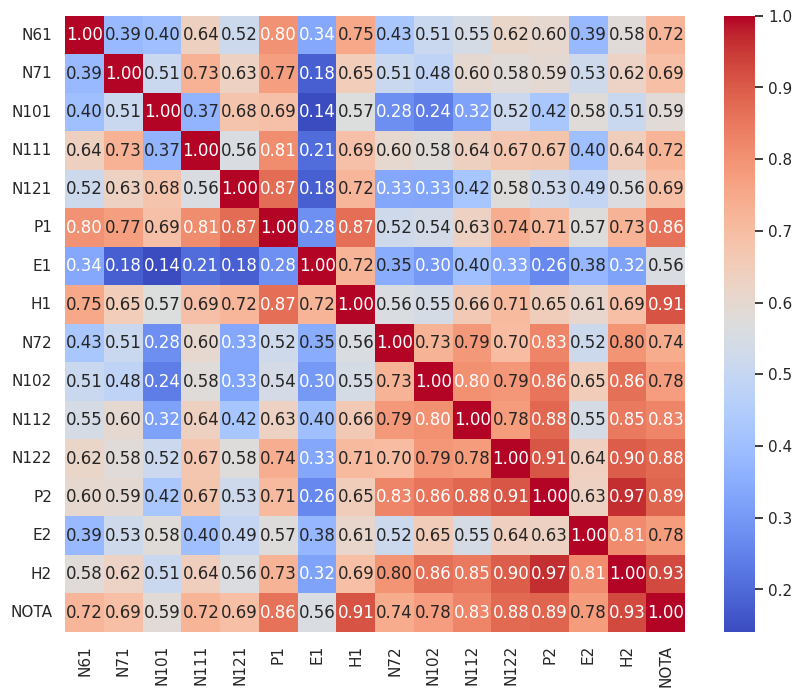

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(tabla_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

##Análisis específico
Realiza análisis más específicos según las preguntas de investigación. Por ejemplo, se puede realizar análisis de la relación entre N61 (evaluaciones sistemáticas) y H1 (notas de los hemisemestres).

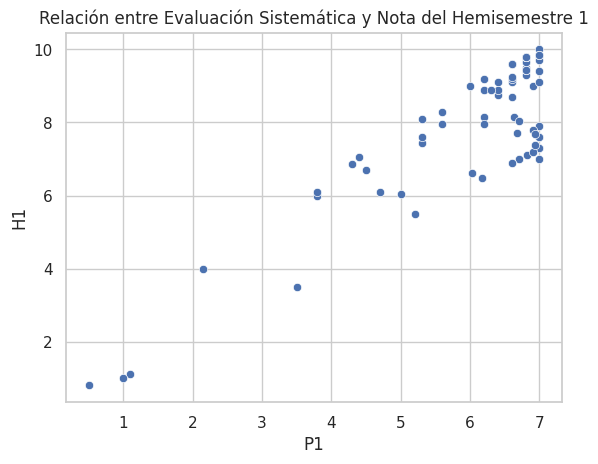

In [ ]:
sns.scatterplot(x='P1', y='H1', data=tabla)
plt.title('Relación entre Evaluación Sistemática y Nota del Hemisemestre 1')
plt.show()

## Modelo de regresión

Para el análisis específico con un modelo de regresión lineal simple, usaremos dos variables. Aquí, por ejemplo, analizaremos la relación entre N61 (Evaluación Sistemática) y H1 (Nota del Hemisemestre 1).

In [ ]:
# Definir variables independientes y dependientes
X = tabla[['P1']].values  # Variable independiente
y = tabla['H1'].values  # Variable dependiente

En este bloque de código se crea el modelo de regresión lineal simple, se calcula el coeficiente de correlación y el $R^2$

In [ ]:
# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Realizar predicciones
y_pred = model.predict(X)

# Calcular el coeficiente de correlación y el R^2
corr_matrix = np.corrcoef(tabla['P1'], tabla['H1'])
corr = corr_matrix[0, 1]
r2 = r2_score(y, y_pred)

print(f'Coeficiente de correlación: {corr}')
print(f'R^2: {r2}')

Coeficiente de correlación: 0.8675086052706591
R^2: 0.7525711802186457


A continuación se visualiza la recta de regresión

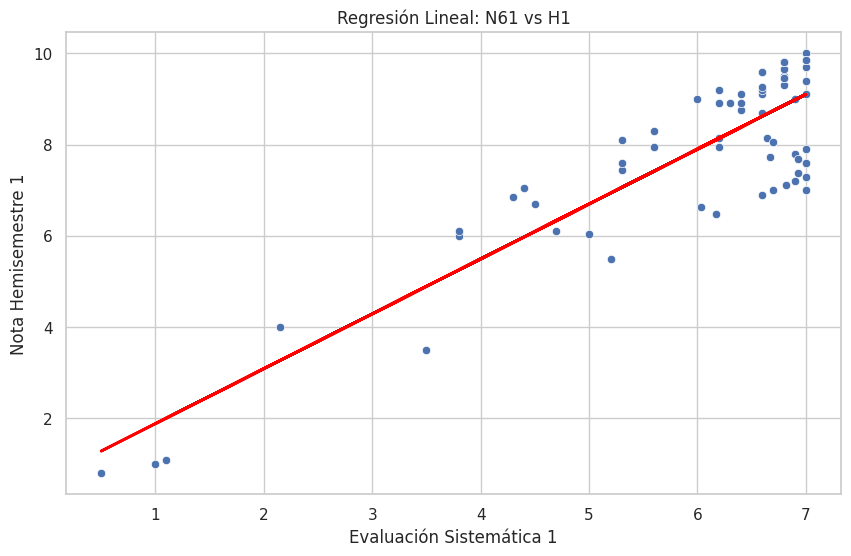

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='P1', y='H1', data=tabla)
plt.plot(tabla['P1'], y_pred, color='red', linewidth=2)
plt.xlabel('Evaluación Sistemática 1')
plt.ylabel('Nota Hemisemestre 1')
plt.title('Regresión Lineal: N61 vs H1')
plt.show()